q2

p1

a

In [ ]:
import numpy as np

def forward(X, W1, W2):
    Z_linear = X.dot(W1.T)

    Z = np.tanh(Z_linear)

    y_pred = Z.dot(W2.T)

    return y_pred, Z

In [ ]:
N, D, M = 100, 10, 30
np.random.seed(0)
X = np.random.rand(N, D)
W1 = np.random.rand(M, D) * 0.01
W2 = np.random.rand(1, M) * 0.01

y_pred, Z = forward(X, W1, W2)

print("Predicted outputs (y_pred):\n", y_pred[:5])
print("Hidden layer activations (Z):\n", Z[:5])

Predicted outputs (y_pred):
 [[0.00562255]
 [0.00504466]
 [0.00522278]
 [0.00515005]
 [0.00352241]]
Hidden layer activations (Z):
 [[0.02428678 0.02380465 0.03740625 0.02604564 0.03241442 0.02829807
  0.02734828 0.0310644  0.03871194 0.03423438 0.03270053 0.02521403
  0.03780142 0.03036419 0.02325909 0.02926844 0.030921   0.03289529
  0.04122793 0.02709883 0.03714017 0.02879962 0.03747969 0.01473863
  0.03438035 0.03816687 0.0410673  0.03411754 0.02101804 0.03539935]
 [0.02520651 0.0246696  0.02936234 0.02702053 0.03283938 0.02514646
  0.02441799 0.02654556 0.03565062 0.03428734 0.02595444 0.02248459
  0.02797346 0.02596188 0.024071   0.02201518 0.03552317 0.0247352
  0.03904392 0.02317343 0.03581861 0.02280875 0.03349189 0.01106237
  0.02616234 0.040735   0.03113461 0.0274891  0.01550951 0.02664798]
 [0.02544605 0.02330261 0.03214721 0.02584543 0.03075584 0.02336427
  0.02579662 0.02686251 0.03686219 0.03444148 0.02983389 0.01969436
  0.03483919 0.02439342 0.02314403 0.02695923 0.0307

b

In [ ]:
def backward(X, y, M, iters, lr):
    N, D = X.shape

    np.random.seed(0)
    W1 = np.random.randn(M, D) * 0.01
    W2 = np.random.randn(1, M) * 0.01

    error_over_time = np.zeros(iters)

    for i in range(iters):
        index = np.random.randint(0, N)
        X_sample = X[index:index+1]
        y_sample = y[index:index+1]

        y_pred, Z = forward(X_sample, W1, W2)

        error = 0.5 * np.mean((y_sample - y_pred) ** 2)
        error_over_time[i] = error

        dL_dy_pred = y_pred - y_sample
        dL_dW2 = dL_dy_pred * Z

        dL_dZ = dL_dy_pred * W2
        dZ_dZ_linear = 1 - Z ** 2
        dL_dZ_linear = dL_dZ * dZ_dZ_linear
        dL_dW1 = dL_dZ_linear.T.dot(X_sample)

        W2 -= lr * dL_dW2
        W1 -= lr * dL_dW1

    return W1, W2, error_over_time

p2

a

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


data = pd.read_csv('winequality-red.csv')


X = data.drop(columns=['quality']).values
y = data['quality'].values.reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])


M = 30
iters = 1000
lr = 0.01

b

In [ ]:
W1, W2, error_over_time = backward(X_train, y_train, M, iters, lr)

print("Final W1 (weights from input to hidden layer):\n", W1)
print("Final W2 (weights from hidden layer to output layer):\n", W2)
print("Error over time:\n", error_over_time)

Final W1 (weights from input to hidden layer):
 [[ 8.89929199e-01  1.89898139e-04 -8.94690062e-03  2.14423188e-03
   3.26629723e-02  3.93523947e-03 -6.49958772e-04 -3.39203233e-02
  -2.06940135e-02  7.23595625e-03  4.45507855e-02  5.77779603e-02]
 [ 3.88514477e-01 -1.92297410e-02 -2.27184360e-02 -1.88578426e-02
  -8.28209449e-03 -2.76164959e-02 -1.77933768e-02 -4.24758627e-02
  -3.75930694e-02  2.16526172e-02  1.36259519e-02  6.07443250e-03]
 [ 1.02222050e+00 -1.51702333e-02 -2.98852854e-02 -1.04261513e-02
   3.76950770e-02  1.21387356e-02  1.10523424e-02 -2.61169374e-02
  -3.23733275e-02 -1.75036388e-02  4.61140751e-02  5.61928840e-02]
 [ 5.63953925e-01 -1.19155574e-03 -3.78049847e-02 -2.16380829e-02
  -5.75605578e-03 -2.89288622e-02 -3.06384378e-02 -9.93299092e-03
  -1.99759805e-02  2.55899806e-03  1.00611297e-02  4.26809934e-02]
 [-6.28247198e-01  4.82402708e-03  2.28083526e-02  1.84748044e-02
  -9.29622928e-03  3.05376110e-04  1.74368851e-02  3.65392069e-02
   1.48553582e-02 -5.484

c

In [ ]:
y_pred_test, _ = forward(X_test, W1, W2)

rmse = np.sqrt(np.mean((y_test - y_pred_test) ** 2))

print("Root Mean Squared Error (RMSE) on test data:", rmse)

Root Mean Squared Error (RMSE) on test data: 0.7542280162913229


d

Final RMSE for learning rate 0.001: 3.2031704822165823
Final RMSE for learning rate 0.01: 1.1567218818346368
Final RMSE for learning rate 0.1: 1.5861338073687135e+38


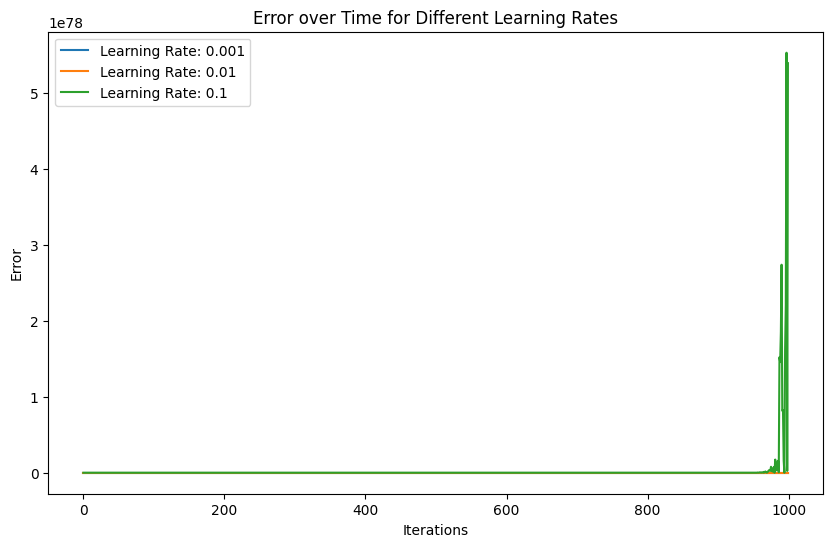

In [ ]:
import matplotlib.pyplot as plt

def train_with_learning_rates(X_train, y_train, learning_rates, M, iters):
    error_histories = {}
    for lr in learning_rates:
        W1, W2, error_over_time = backward(X_train, y_train, M, iters, lr)
        error_histories[lr] = error_over_time
        print(f"Final RMSE for learning rate {lr}: {np.sqrt(np.mean(error_over_time))}")
    return error_histories

learning_rates = [0.001, 0.01, 0.1]
M = 30
iters = 1000

error_histories = train_with_learning_rates(X_train, y_train, learning_rates, M, iters)

plt.figure(figsize=(10, 6))
for lr, errors in error_histories.items():
    plt.plot(errors, label=f'Learning Rate: {lr}')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error over Time for Different Learning Rates')
plt.legend()
plt.show()